58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 1, 1, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             514 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,846,530 (56.64 MB)

 Trainable params: 14,846,530 (56.64 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/3


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1/1 ━━━━━━━━━━━━━━━━━━━━ 17s 17s/step - accuracy: 1.0000 - loss: 0.2477 - val_accuracy: 0.0000e+00 - val_loss: 0.7867
Epoch 2/3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.7867
Epoch 3/3


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step - accuracy: 1.0000 - loss: 0.1009 - val_accuracy: 0.0000e+00 - val_loss: 1.2103


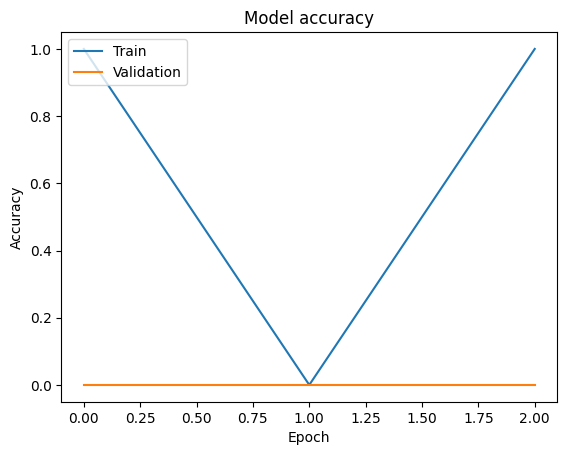

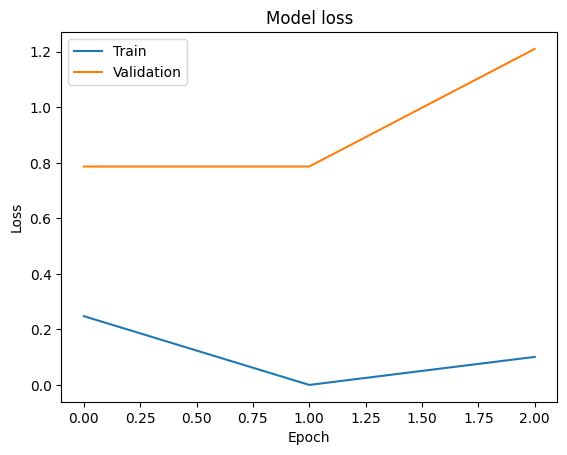

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.0000e+00 - loss: 1.2103
Test accuracy: 0.0


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from keras.applications.vgg16 import VGG16
from keras.models import Sequential
from keras.layers import InputLayer, Dense, Flatten, Dropout
from keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.datasets import load_sample_images

# Load a random dataset: sample images from sklearn
data = load_sample_images()
x_data = np.array([data.images[0], data.images[1]])  # Two sample images
y_data = np.array([0, 1])  # Dummy labels (e.g., 0 for image 1, 1 for image 2)

# Preprocess the images: Resize and normalize
x_data = np.array([np.resize(img, (32, 32, 3)).astype('float32') / 255.0 for img in x_data])
y_data = to_categorical(y_data, 2)  # One-hot encode for 2 classes

# Split the dataset into training and testing sets
x_train, x_test = x_data[:1], x_data[1:]  # Just one for training and one for testing
y_train, y_test = y_data[:1], y_data[1:]

# Load VGG16 model pre-trained on ImageNet, without the top layers
base_model = VGG16(weights='imagenet', include_top=False)

# Build the model
model = Sequential()

# Define input shape for the Sequential model
model.add(InputLayer(input_shape=(32, 32, 3)))

# Add the VGG16 base model
model.add(base_model)

# Flatten the output from VGG16's convolutional layers
model.add(Flatten())

# Add a fully connected layer with 256 units and ReLU activation
model.add(Dense(256, activation='relu'))

# Add Dropout for regularization
model.add(Dropout(0.5))

# Add output layer with 2 units (for 2 classes) and softmax activation
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

# Data augmentation to reduce overfitting
datagen = ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

# Fit the model using data augmentation
batch_size = 1  # Batch size of 1 due to limited data
epochs = 3
train_generator = datagen.flow(x_train, y_train, batch_size=batch_size)

# Train the model
history = model.fit(train_generator,
                    steps_per_epoch=1,  # Only one step since we have one training sample
                    epochs=epochs,
                    validation_data=(x_test, y_test))

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc}")
